## Task 1

In [1]:
import array
import numpy as np
import matplotlib.pyplot as plt


binfpath="/fs/lustre/cita/hqchen/data/z-ifrit-a=0.1401.bin"
with open(binfpath,'rb') as f:
    binarydata=f.read()
lllen=8; flen=4; ilen=4 

N=1024

firstfield=lllen*2+3*ilen

nextfield=firstfield

xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])


xHI=np.reshape(xHI,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
delta=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
delta=np.reshape(delta,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
T=np.reshape(T,(N,N,N),order='F')




/tmp/ipykernel_304406/591149048.py:8: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_304406/591149048.py:14: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

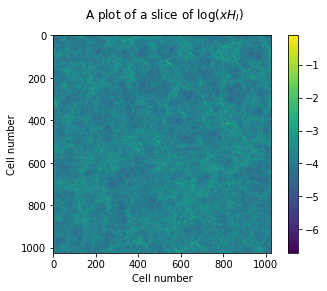

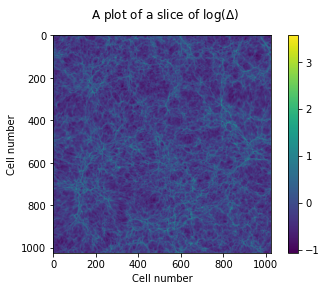

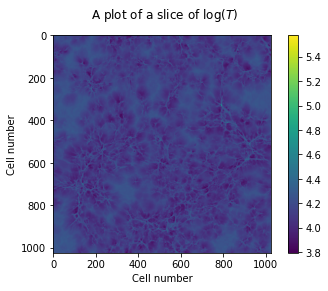

In [2]:
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")

## Task 2

In [3]:
import astropy

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
crt_dns = cosmo.critical_density(6)
mean_gas_density = crt_dns*cosmo.Ob(6)
print(mean_gas_density)

1.432778841086186e-28 g / cm3


## Task 3

In [5]:
from astropy.constants import m_p
p = m_p.to(u.g)


In [6]:
print(delta.max())
index = np.where(delta == delta.max())
print(index[0])

39938.367
[203]


In [7]:
print(index[2])
print(delta[index][0])

[460]
39938.367


In [8]:
sigma  = 4.48e-18*u.cm**2
nH =  (0.76*mean_gas_density/p)
nHI = xHI*nH
nHI = nHI.astype('float128')
cml = (40/0.68)/1024*u.Mpc 
ds = cml*(1/(1+6))
ds = ds.to(u.cm)
dT = sigma * nHI * ds

In [9]:
print(dT[index][0])

2.2700645736128338


In [10]:
print(nHI.max())

5.547614273382351e-05 1 / cm3


## Task 4

In [11]:
from numpy import float128
print(nHI)

[[[6.74571377e-09 6.38827302e-09 5.75865577e-09 ... 1.07600648e-08
   8.21360135e-09 7.04414260e-09]
  [7.67662289e-09 6.92509960e-09 6.13529849e-09 ... 1.13985843e-08
   9.96054794e-09 8.55018278e-09]
  [9.01550923e-09 7.51253726e-09 6.50632348e-09 ... 1.14072840e-08
   1.12177583e-08 1.05493712e-08]
  ...
  [5.40711653e-09 5.72221870e-09 6.19928953e-09 ... 6.03759931e-09
   5.55259971e-09 5.45984546e-09]
  [5.71314507e-09 5.72291681e-09 5.85148463e-09 ... 7.31123873e-09
   6.16871665e-09 5.86614579e-09]
  [6.06233908e-09 5.96980865e-09 5.72571146e-09 ... 9.11899800e-09
   6.97984026e-09 6.31654506e-09]]

 [[5.48221868e-09 5.28250510e-09 5.17780352e-09 ... 8.64833005e-09
   7.15157933e-09 6.03492856e-09]
  [6.61523991e-09 5.69851810e-09 5.04244824e-09 ... 9.86796511e-09
   9.04403130e-09 7.89581023e-09]
  [8.48688053e-09 6.67445255e-09 5.43424594e-09 ... 9.99739669e-09
   1.04928599e-08 1.01232711e-08]
  ...
  [5.35914690e-09 5.90746518e-09 6.73172940e-09 ... 5.94980287e-09
   5.42529

In [12]:
from numpy import float128

new_tau = dT[index][0]
print(new_tau)
percent = float128(10)
percent = float128(np.exp(-new_tau)*100)
print(percent)

2.2700645736128338
10.3305509057770924745


## Task 5

In [13]:
halofpath="/fs/lustre/cita/hqchen/data/hlist_0.14005.list"
halodata = np.loadtxt(halofpath, skiprows = 63) 

halomass = halodata[:, 10]




#mass = []
#for i in range(len(halodata)):
#    mass = np.append(mass, float128(halodata[i][83:94]))

[]

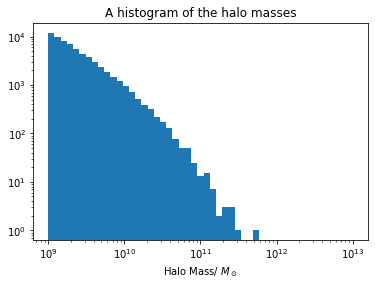

In [14]:
plt.hist(halomass, bins = np.logspace(start =np.log10(10**9), stop = np.log10(10**13)))
plt.gca().set_xscale("log")
plt.title("A histogram of the halo masses")
plt.xlabel("Halo Mass/ $M_\odot$")
plt.loglog()




## Task 6

/tmp/ipykernel_304406/2011251566.py:25: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_304406/2011251566.py:33: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

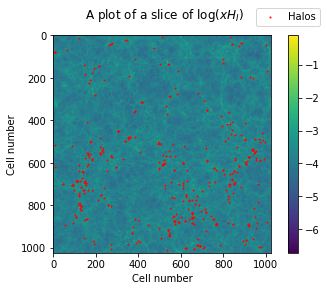

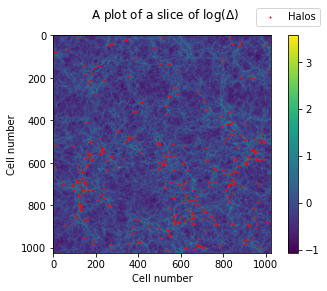

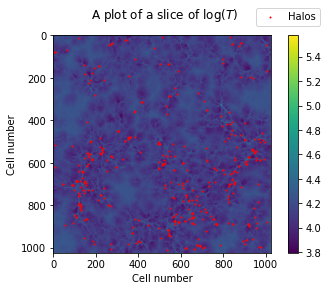

In [15]:
x, y, z = halodata[:, 17], halodata[:, 18], halodata[:, 19]

m = 1024*0.9839115/(40)
x, y, z = m*x, m*y, m*z




x_int = x.astype(int)
indices = np.where(x_int ==0)
y_int = y[indices]
z_int = z[indices]


fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
ax1.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax1.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))

fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
ax2.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax2.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
ax3.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax3.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")



/tmp/ipykernel_304406/2493785927.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

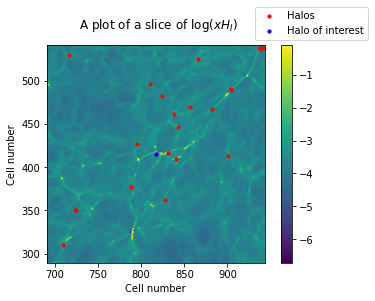

In [16]:

pointz, pointy = z[indices[0][0]], y[indices[0][0]]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-5*m, pointz + 5*m])
ax4.set_ylim([pointy - 5*m, pointy+5*m])
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.20))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


## Task 7

/tmp/ipykernel_304406/2979926674.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

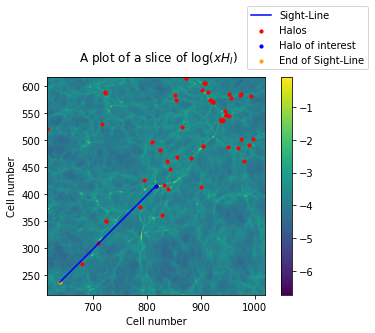

In [17]:
from sympy.solvers import solve
from sympy import Symbol

length = 10*m

pointsz = [pointz, pointz - length/np.sqrt(2)]
pointsy = [pointy, pointy - length/np.sqrt(2) ]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-8*m, pointz + 8*m])
ax4.set_ylim([pointy - 8*m, pointy+8*m])
ax4.plot(pointsz, pointsy, color = 'blue', label = 'Sight-Line')
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.scatter(pointz - length/np.sqrt(2), pointy - length/np.sqrt(2), color = 'orange', s=10, label = 'End of Sight-Line')
ax4.legend(loc = 'upper right', bbox_to_anchor = ( 1.5, 1.35))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


Text(0, 0.5, 'Density contrast')

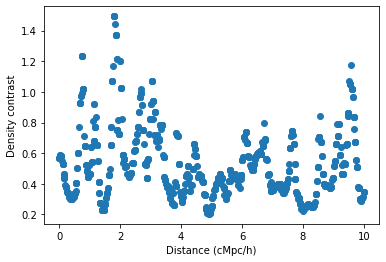

In [18]:
t = np.linspace(0, 1, 1000)



sight = (np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) * t[:, None] + np.array((pointz, pointy))
#for i in range(len(t)):
#    sight[i] = t[i]*(np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) + np.array((pointz, pointy))

sight = np.around(sight)
sight = sight.astype(int)

density = np.zeros(len(t))


for i in range(len(t)):
    density[i] = delta[0][sight[i][0]][sight[i][1]]

distance = np.linalg.norm((sight- np.array((pointz, pointy))), axis = 1)


distance = distance/m

plt.scatter(distance, density)
plt.xlabel('Distance (cMpc/h)' )
plt.ylabel('Density contrast')

## Analyzing Lyman Limit Systems

In [19]:
#Function to choose a Lymann Limit system given a LOS 
length = 50*m

def lyman(start, direction):
    ''' A function to select a Lyman Limit System given a start point and an end point
    Parameters
    __________
    start : contains the positional cooridinates of the start point
           numpy array
    end : contains the positional coordinates of the end point
           numpy array
    '''
    t = np.linspace(0, 1, 1000)
    sight, new_sight =  start + t[:, None]*(length*direction), start + t[:, None]*(length*direction)
    LLS = np.array([])
    LLS_trunc = np.array([])
   

    for i in range(len(t)):
        while new_sight[i][0]<0:
            new_sight[i][0] = 1023 + new_sight[i][0]
        
        while new_sight[i][1]<0:
            new_sight[i][1] = 1023 + new_sight[i][1]
            
        while new_sight[i][2]<0:
            new_sight[i][2] = 1023 + new_sight[i][2]
            
   
    
        while new_sight[i][0]>1023:
            new_sight[i][0] = new_sight[i][0] - 1023
        
        while new_sight[i][1]>1023:
            new_sight[i][1] = new_sight[i][1] - 1023
        
        while new_sight[i][2]>1023:
            new_sight[i][2] = new_sight[i][2] - 1023
            
       
    sight = np.around(sight)
    sight = sight.astype(int)
    new_sight = np.around(new_sight)
    new_sight = new_sight.astype(int)
    density = np.zeros(len(t))
   
    for i in range(len(t)):
        density[i] = delta[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]]
        if density[i]>10**2 and sight[i].any()!= LLS.any():
            LLS = np.append(LLS, np.ndarray.tolist(sight[i]))
            LLS_trunc = np.append(LLS_trunc, np.ndarray.tolist(new_sight[i]))
    return LLS, LLS_trunc, sight, new_sight
    

In [20]:
from scipy.signal import argrelextrema

In [60]:
x, y, z = halodata[:, 17], halodata[:, 18], halodata[:, 19]

m = 1024*0.9839115/(40)
x, y, z = m*x, m*y, m*z

x = np.array(x)
y = np.array(y)
z = np.array(z)


ix = np.random.randint(0, len(x)-1)
iy = np.random.randint(0, len(y)-1)
iz = np.random.randint(0, len(z)-1)
print(ixx)
start = np.array((x[ix], y[iy], z[iz]))
print(start)

864141
[855.14623061  31.17787276 517.5151575 ]


(0.0, 400.0)

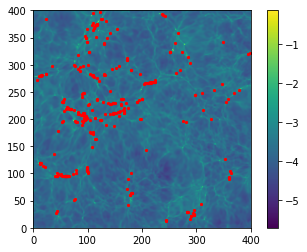

In [61]:
#Checking if the sampling of the start point is correct

x_int = np.asarray(x, dtype = 'int')

indices = np.where(x_int ==x_int[ix])
y_int = y[indices]
z_int = z[indices]


plt.scatter(z_int, y_int, s = 5, color = 'red')
plt.imshow(np.log10(xHI[x_int[ix]]))
plt.colorbar()
plt.ylim([0, 400])
plt.xlim([0, 400])


In [68]:
#Finding the biggest 20 halos 

ind  = np.argpartition(halomass, -20)[-20:]

startx, starty, startz = x[ind], y[ind], z[ind]

start = np.dstack((startx, starty, startz))[0]


In [77]:
from sympy import *


dns_max = [] 
dist_max = []
tot_dist = np.array([])


count = 0

for startpoint in start:
    output = []
    output_true = []
    
    count += 1 
    print(count)
    for i in range(5000):
        phi = np.random.uniform(0,2*pi)
        costheta = np.random.uniform(-1,1)
        theta = acos( costheta )

        posx =  sin( theta) * cos( phi )
        posy =  sin( theta) * sin( phi )
        posz =  cos( theta )

        direction = np.asarray((posx, posy, posz), dtype ='float64')

        lls_true, lls_trunc, sight, new_sight = lyman(startpoint, direction)

        if lls_true.size > 0:
            output.append(np.ndarray.tolist(lls_trunc))
            output_true.append(np.ndarray.tolist(lls_true))
            #Code for finding the local density maxima on a sightline

            d, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 

            d = np.linalg.norm((sight - startpoint), axis = 1)
            d = d/m
            for j in range(len(sight)):
                #d[j]= np.linalg.norm(sight[j] - startpoint)
                dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            dns_sight = dns_sight[np.where(d>1)]
            d = d[np.where(d>1)]
            sight_max = argrelextrema(dns_sight, np.greater)
            max_val, d_max = [dns_sight[k] for k in sight_max], [d[k] for k in sight_max]
            dns_max = np.append(dns_max, np.array(max_val))
            dist_max = np.append(dist_max, np.array(d_max))
            if d.max()>256:
                plt.plot(d, dns_sight)
    
    output.sort()
    output_true.sort()
    newout = np.unique(output, axis = 0)
    newout_true = np.unique(output_true, axis = 0)
    newout = np.asarray(newout, dtype = 'int')
    
    distance = np.linalg.norm((newout_true-startpoint), axis = 1) 
    
    #MUST RECHECK THIS DISTANCE STUFF
    distance = distance/m
    
    tot_dist = np.append(tot_dist, distance)
    

        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [2]:
#These are for a single halo
'''
output.sort()
output_true.sort()
newout = np.unique(output, axis = 0)
newout_true = np.unique(output_true, axis = 0)
newout = np.asarray(newout, dtype = 'int')

print(newout) 
'''


"\noutput.sort()\noutput_true.sort()\nnewout = np.unique(output, axis = 0)\nnewout_true = np.unique(output_true, axis = 0)\nnewout = np.asarray(newout, dtype = 'int')\n\nprint(newout) \n"

In [1]:
#These are for a single halo
'''
from matplotlib.pyplot import cm
x = np.unique(newout[:,0], axis= 0)

color = iter(cm.viridis(np.linspace(0, 1, len(newout))))
for i in range(len(newout)):
    count = 1
    if i>0 and newout[i][0] == newout[i-1][0]:
        count = count + 1 
    c = next(color)
    y = list(filter(lambda x: x[0] == newout[i][0], newout))
    for point in y:
        plt.scatter(point[2], point[1], s = 5, color = 'red')
        plt.scatter(start[3], start[2], s= 10, color = 'red')
    if count == 1:
        plt.imshow(np.log10(delta[newout[i][0]]))
        plt.title('A slice at x = ' + str(newout[i][0]))
        plt.colorbar()
        plt.show()
print(x)
'''


"\nfrom matplotlib.pyplot import cm\nx = np.unique(newout[:,0], axis= 0)\n\ncolor = iter(cm.viridis(np.linspace(0, 1, len(newout))))\nfor i in range(len(newout)):\n    count = 1\n    if i>0 and newout[i][0] == newout[i-1][0]:\n        count = count + 1 \n    c = next(color)\n    y = list(filter(lambda x: x[0] == newout[i][0], newout))\n    for point in y:\n        plt.scatter(point[2], point[1], s = 5, color = 'red')\n        plt.scatter(start[3], start[2], s= 10, color = 'red')\n    if count == 1:\n        plt.imshow(np.log10(delta[newout[i][0]]))\n        plt.title('A slice at x = ' + str(newout[i][0]))\n        plt.colorbar()\n        plt.show()\nprint(x)\n"

In [259]:
#These are for a single halo
'''
#Now, we will plot the number of LLS a particular distance from the quasar
distance = np.linalg.norm((newout_true-start), axis = 1)
#MUST RECHECK THIS DISTANCE STUFF
distance = distance/m

print(distance)
'''


[61.36764893 61.96907121 58.72915866 ... 85.31929576 86.28940957
 83.50290955]


Text(0.5, 1.0, 'Histogram of distances to LLS')

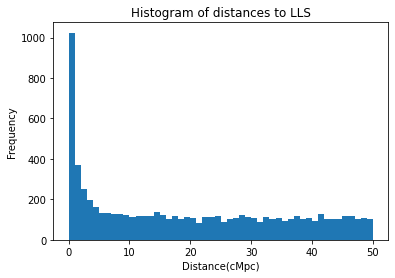

In [78]:
plt.hist(tot_dist, bins=50)
plt.xlabel('Distance(cMpc)')
plt.ylabel('Frequency')
#plt.xlim([1, 50])
plt.ylim()
plt.title('Histogram of distances to LLS')

Text(0.5, 1.0, 'Maximum density contrast vs. distance of LLS')

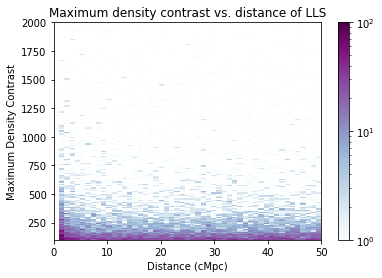

In [80]:
import matplotlib
#Now we will plot a histogram of the local maxima of the density contrast, along with the distance at which they occur

 
plt.hist2d(dist_max, dns_max, bins = (50, 1000), cmap=plt.cm.BuPu, norm=matplotlib.colors.LogNorm(vmin =1, vmax = 100))
plt.colorbar()


plt.xlim([0, 50])
plt.ylim([100, 2000])
plt.xlabel('Distance (cMpc)')
plt.ylabel('Maximum Density Contrast')
plt.title('Maximum density contrast vs. distance of LLS')


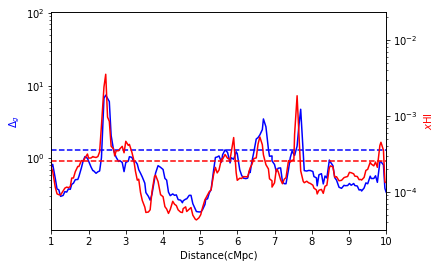

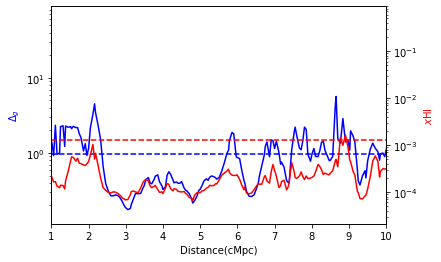

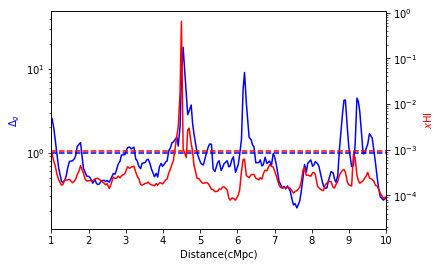

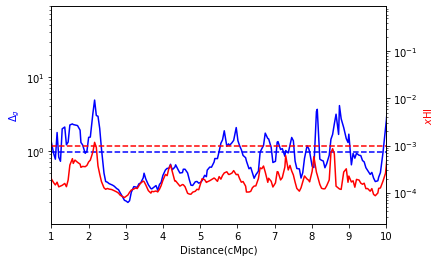

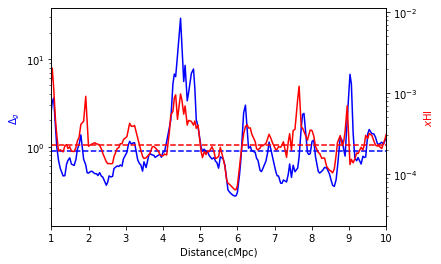

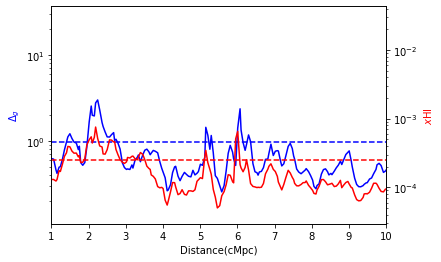

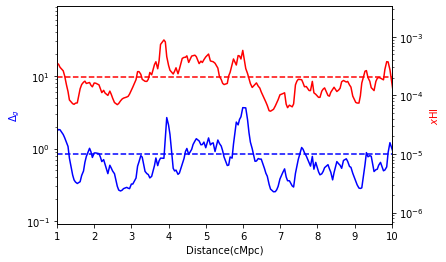

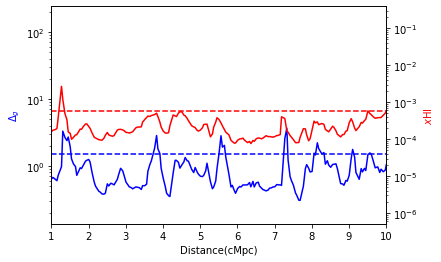

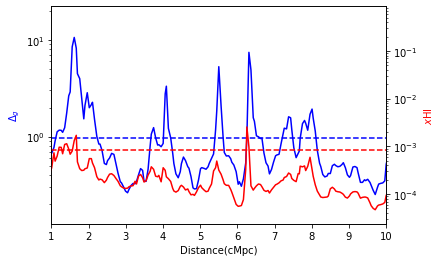

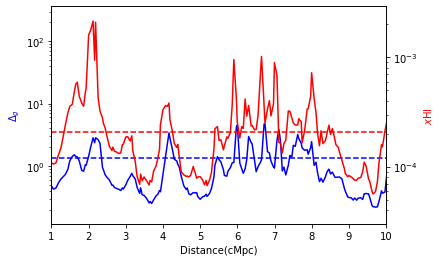

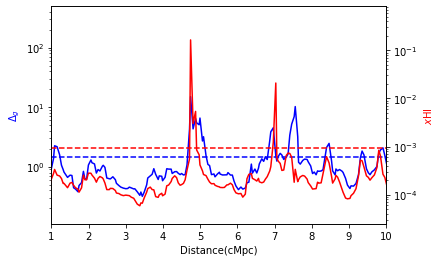

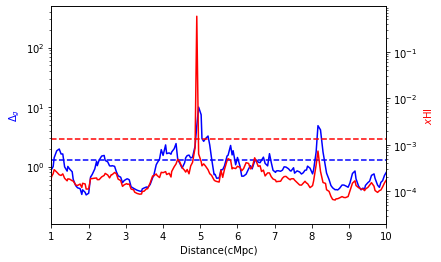

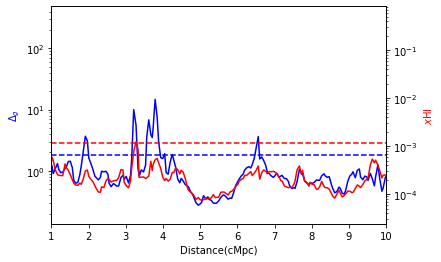

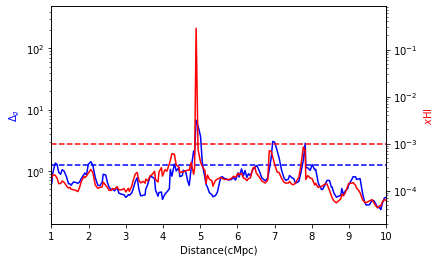

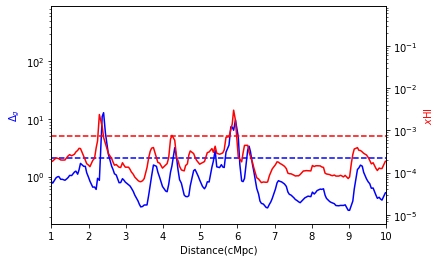

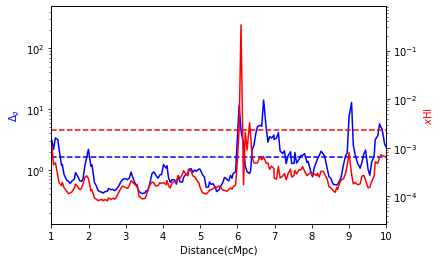

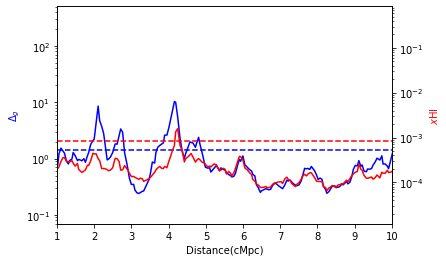

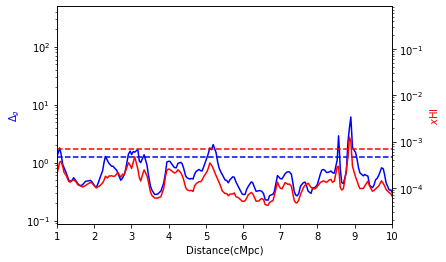

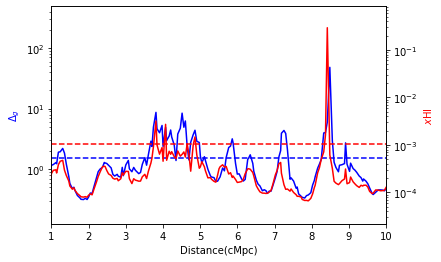

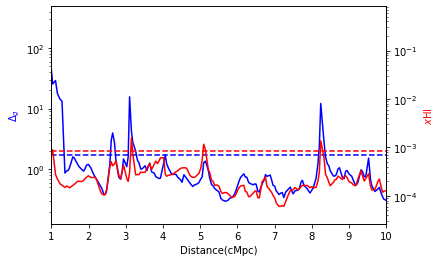

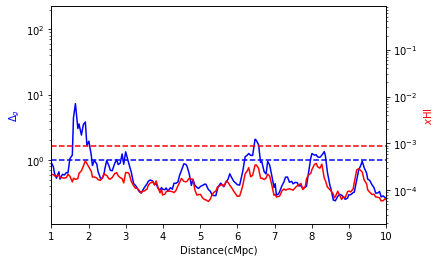

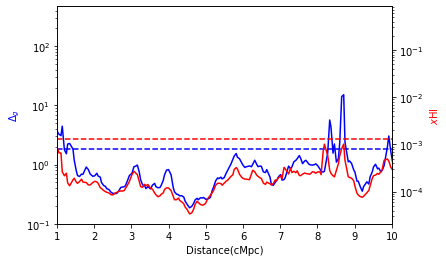

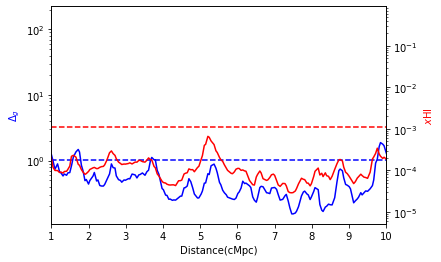

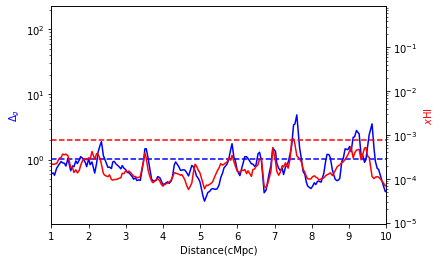

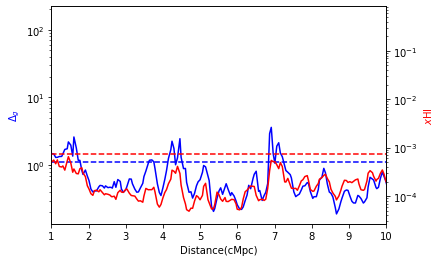

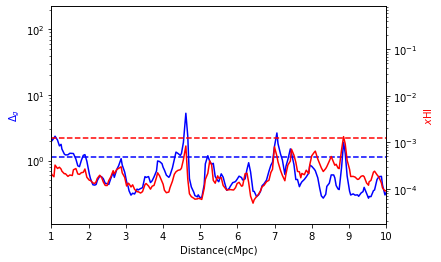

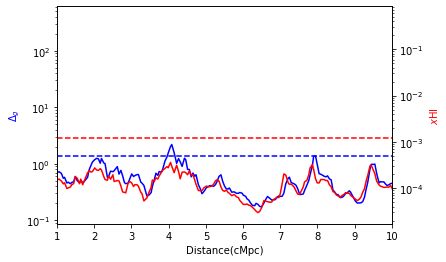

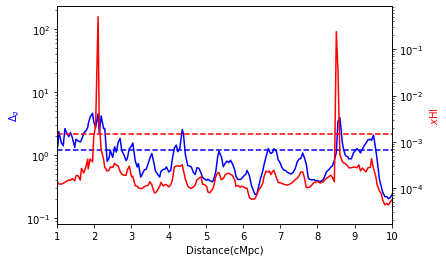

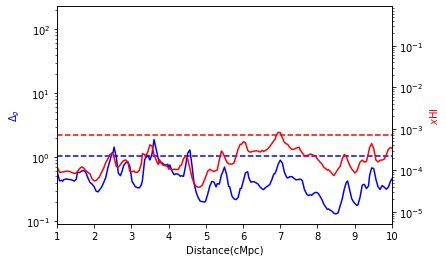

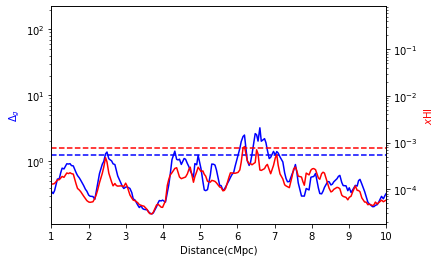

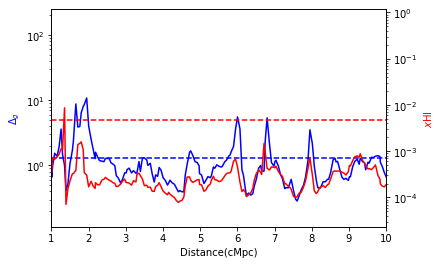

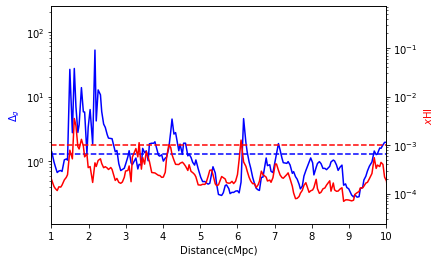

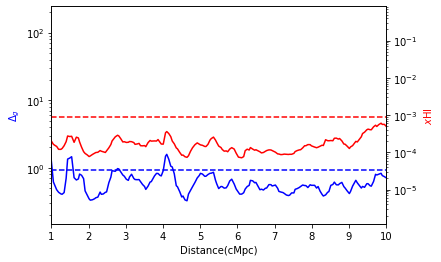

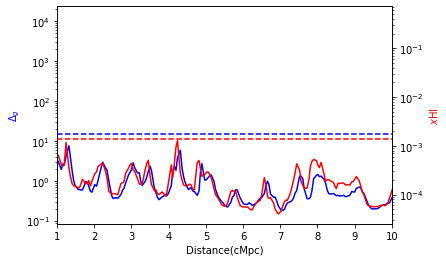

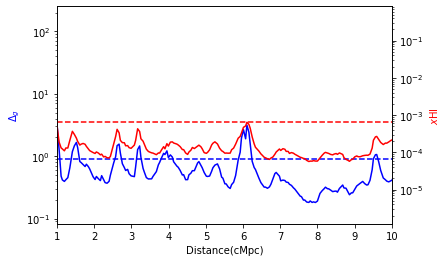

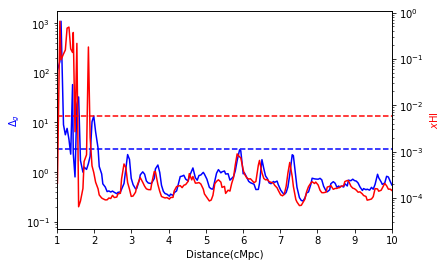

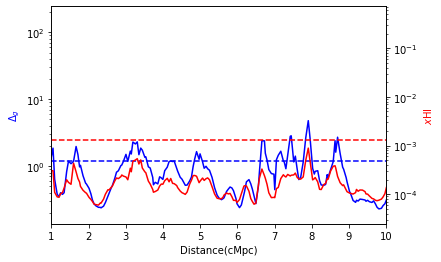

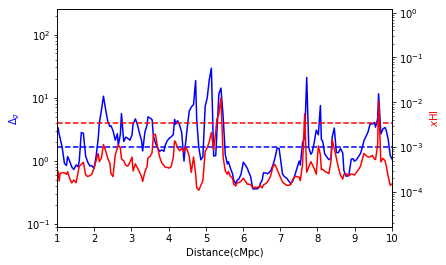

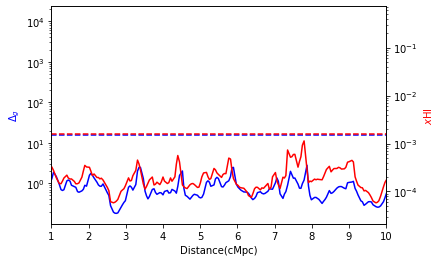

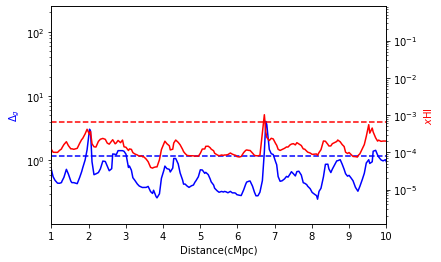

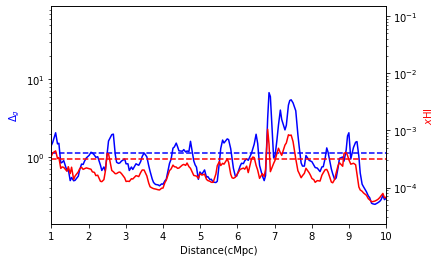

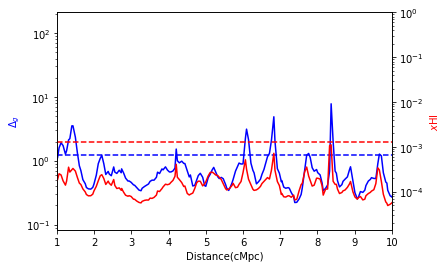

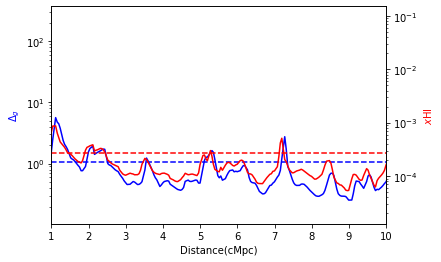

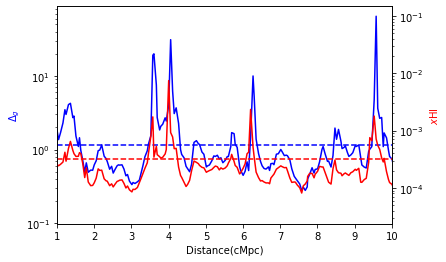

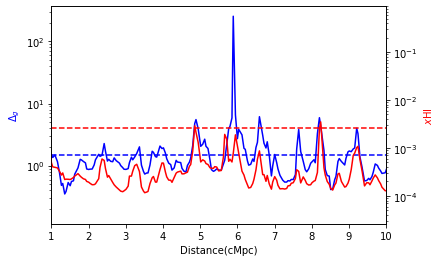

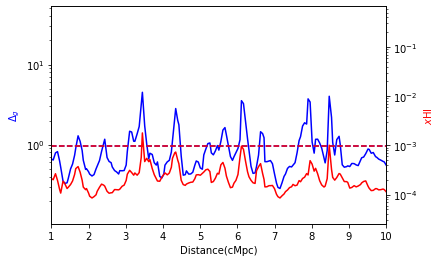

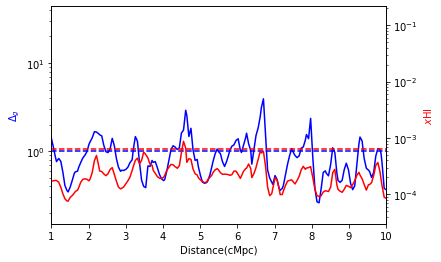

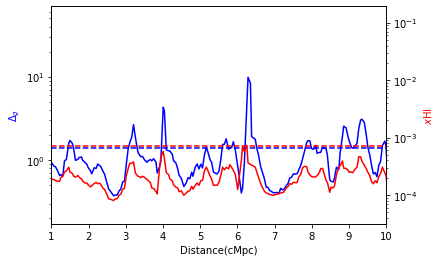

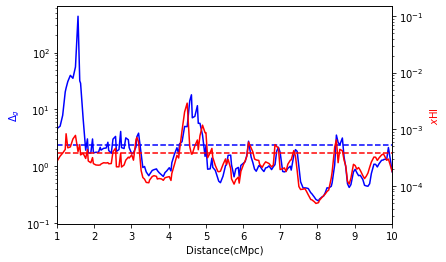

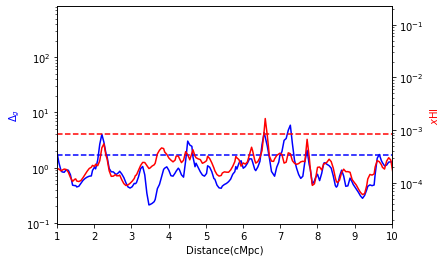

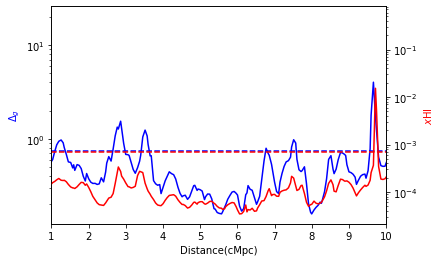

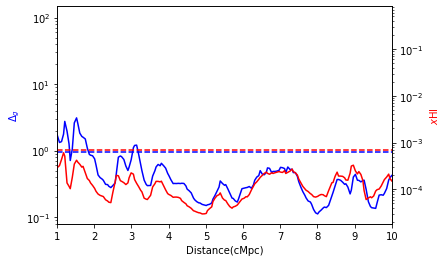

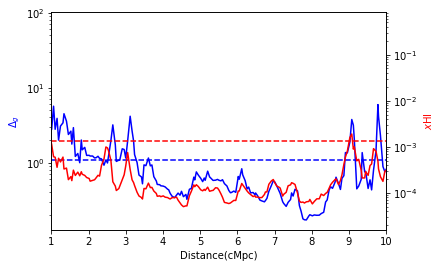

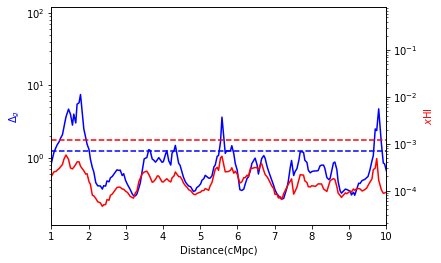

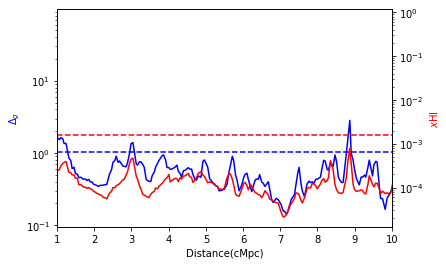

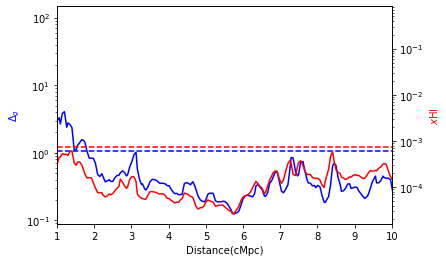

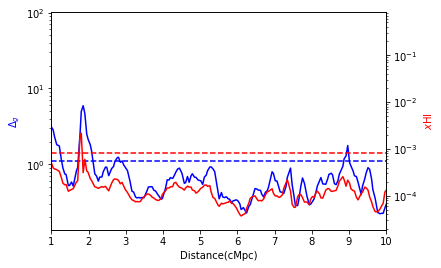

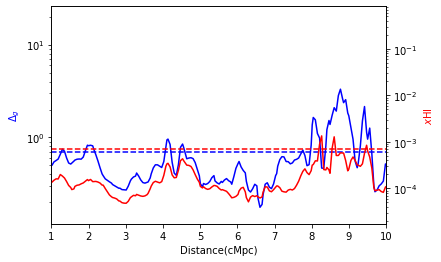

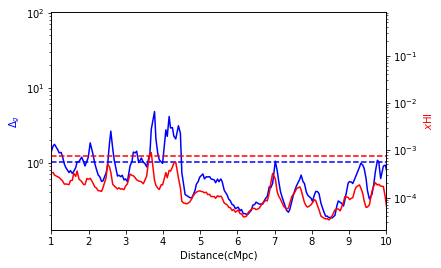

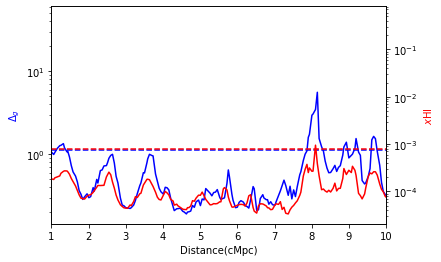

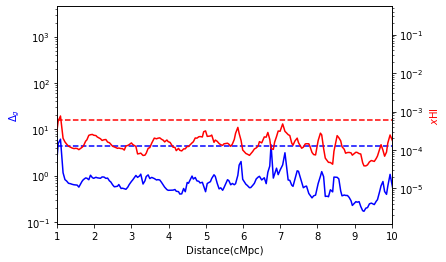

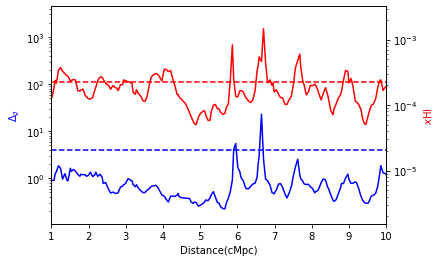

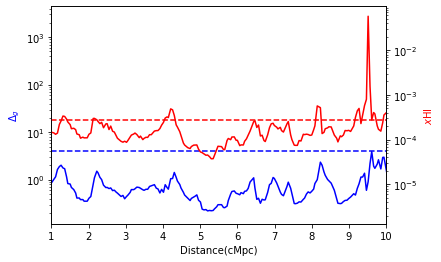

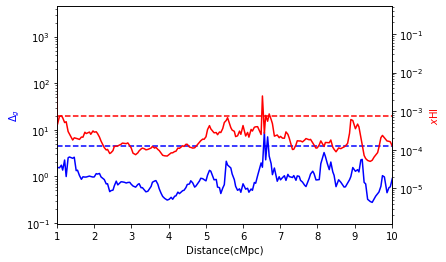

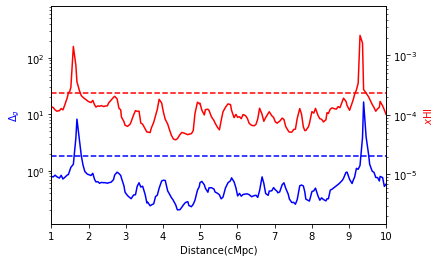

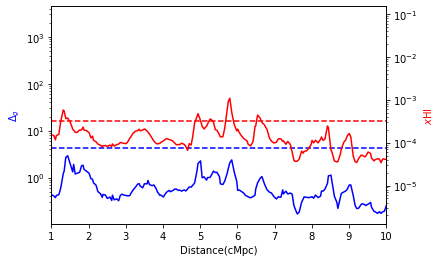

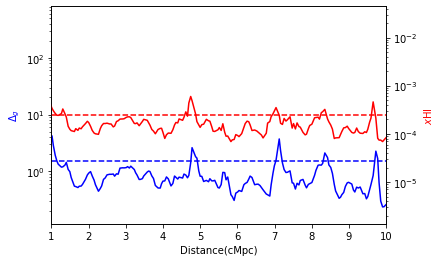

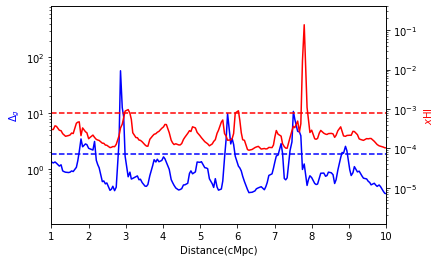

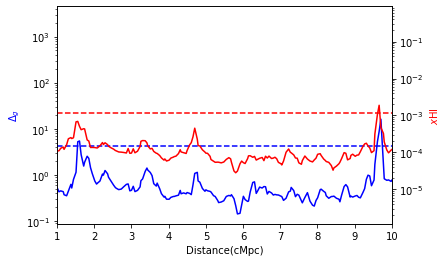

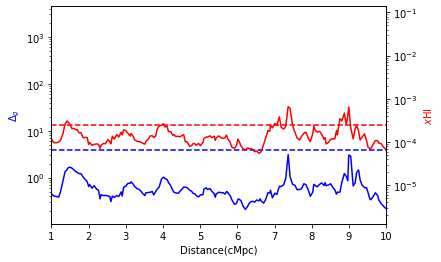

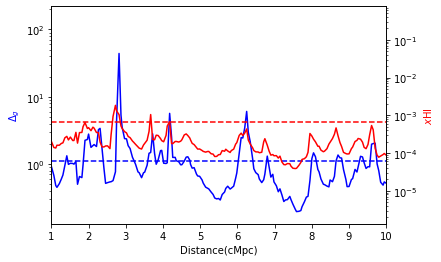

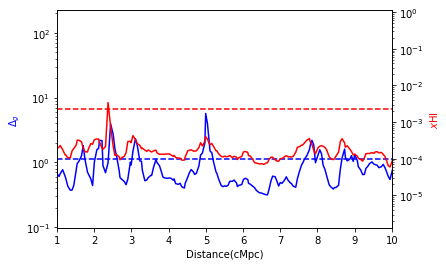

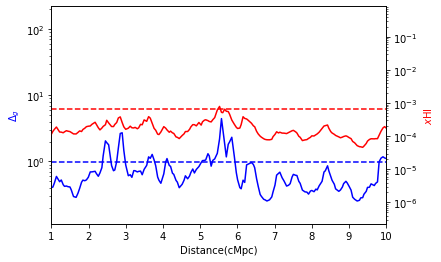

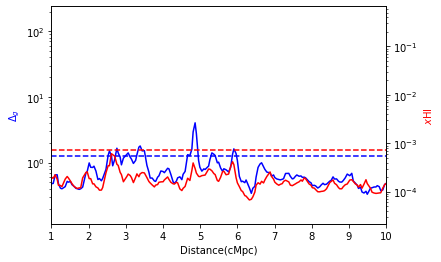

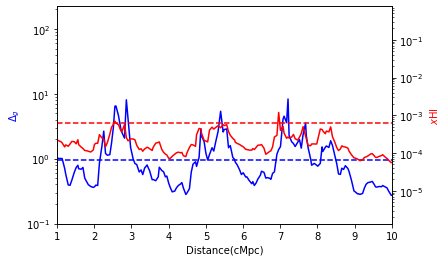

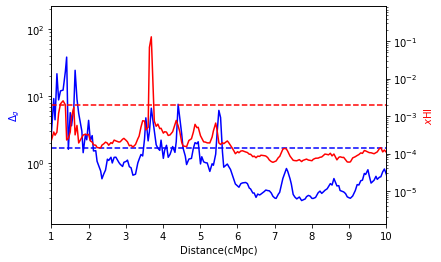

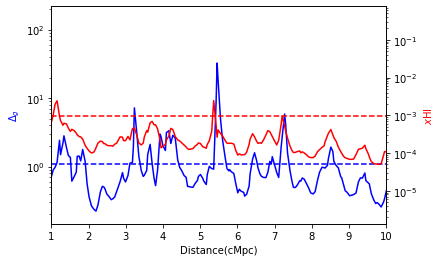

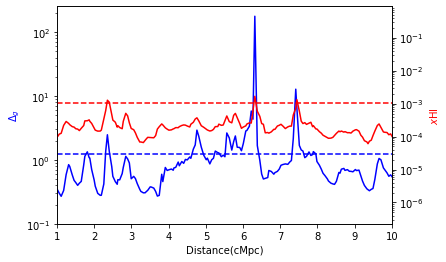

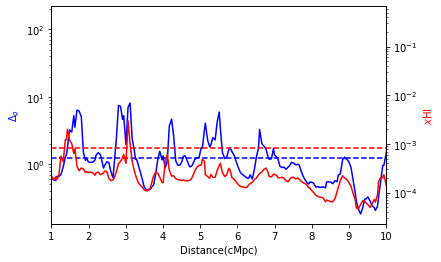

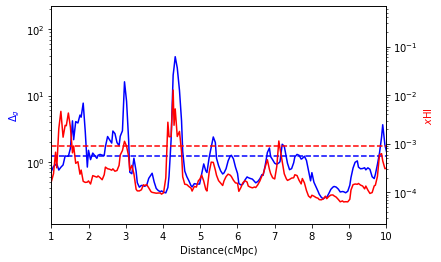

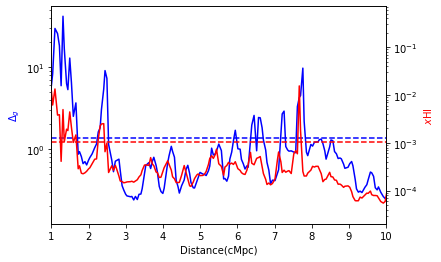

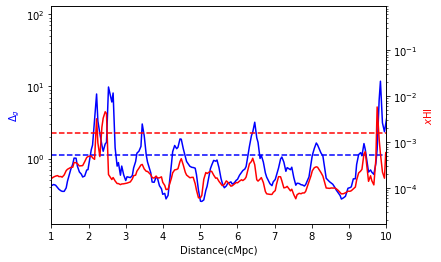

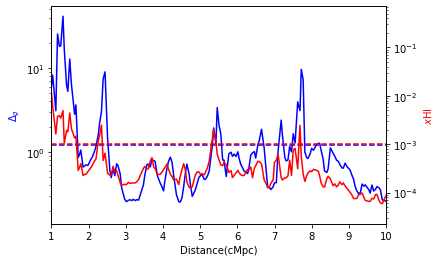

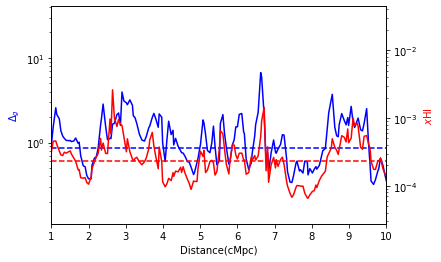

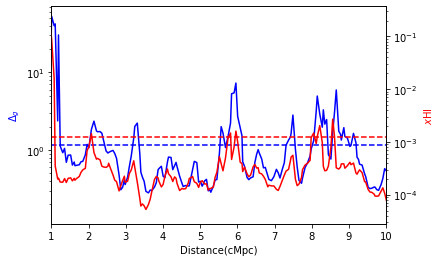

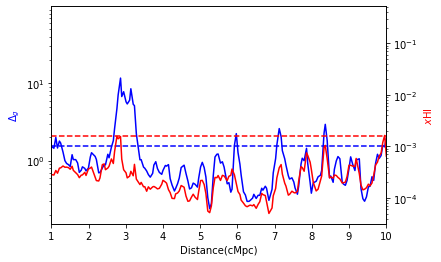

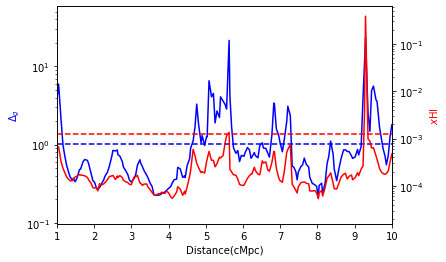

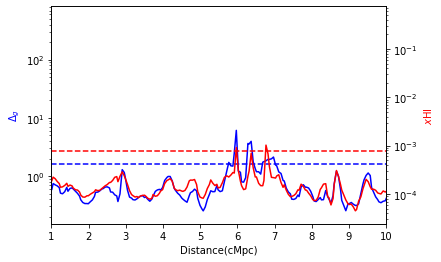

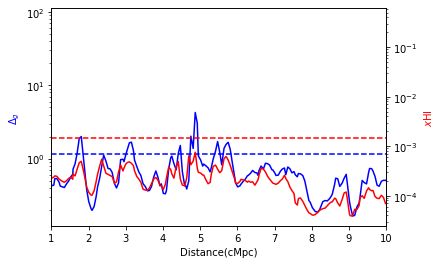

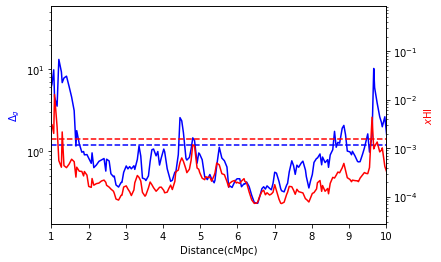

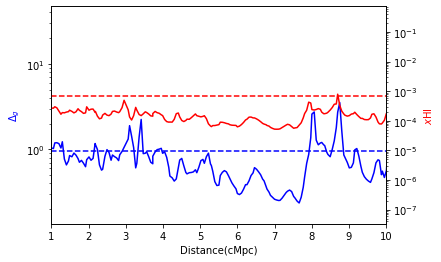

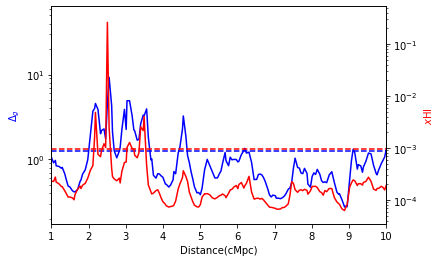

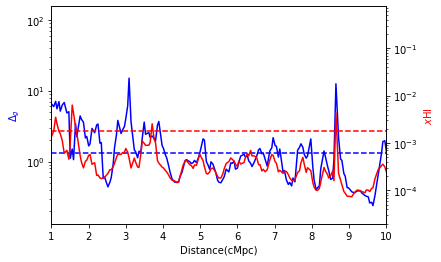

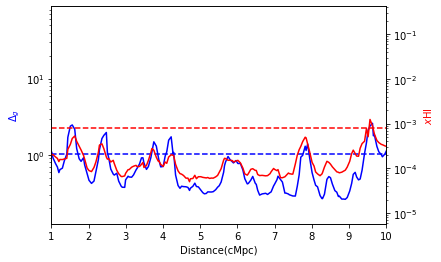

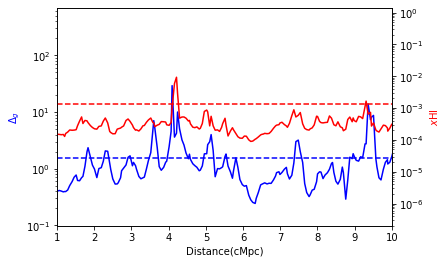

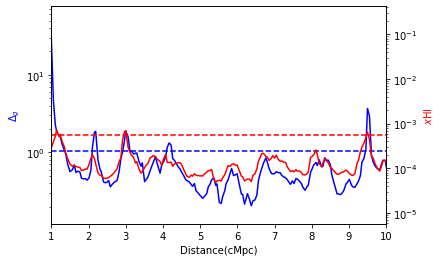

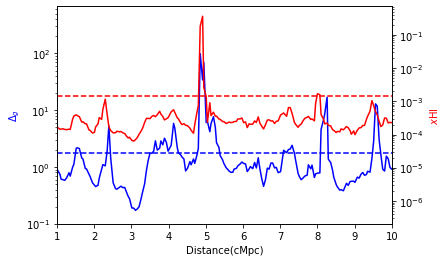

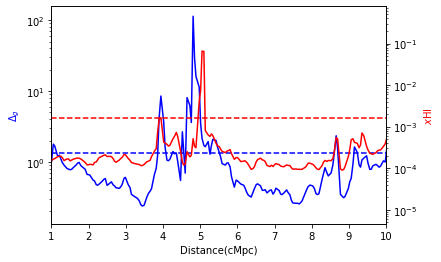

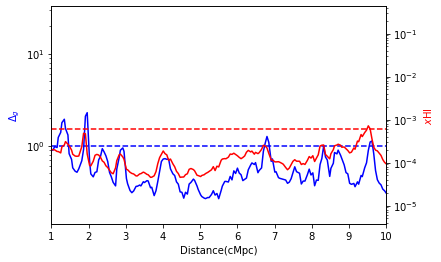

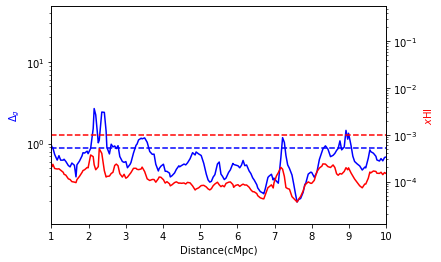

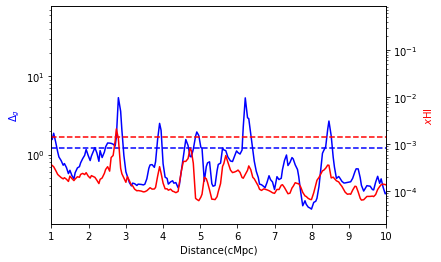

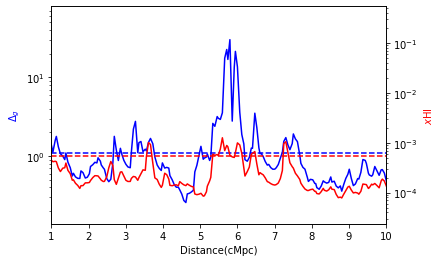

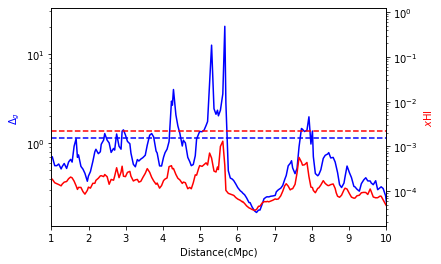

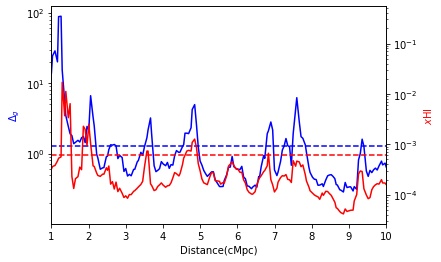

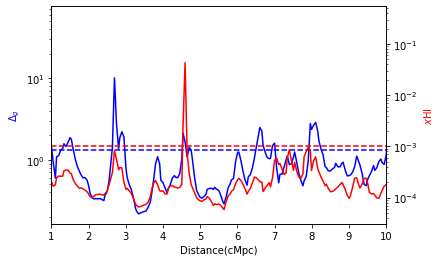

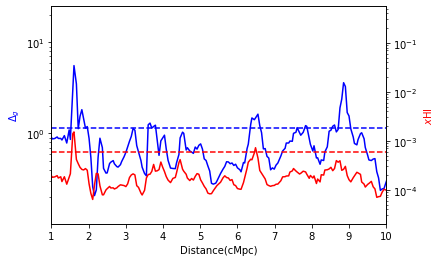

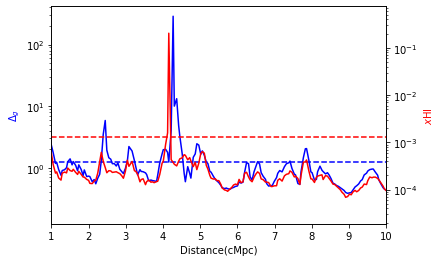

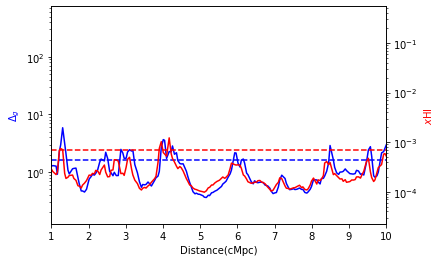

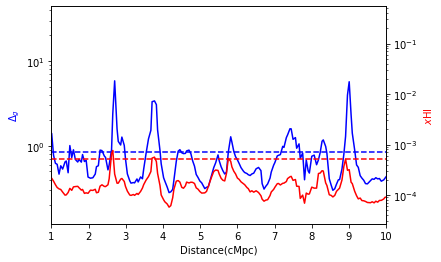

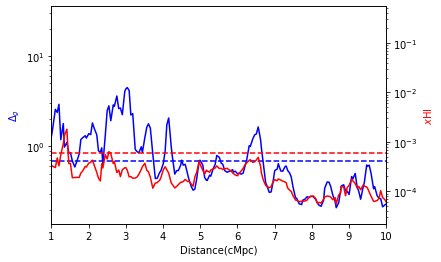

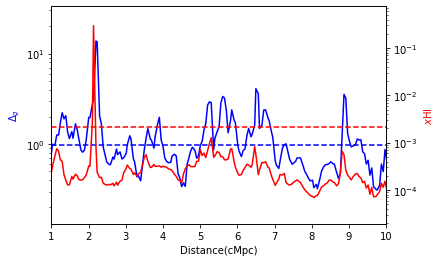

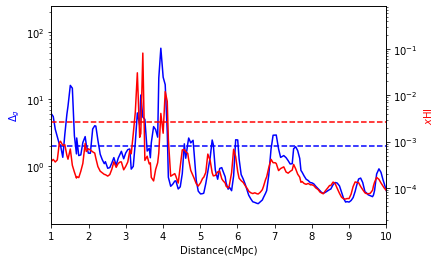

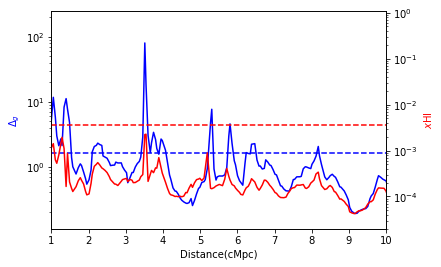

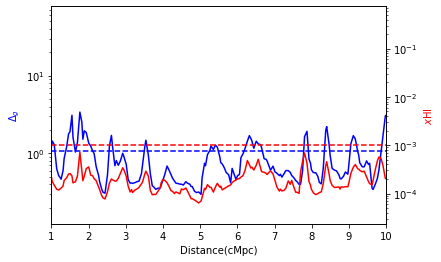

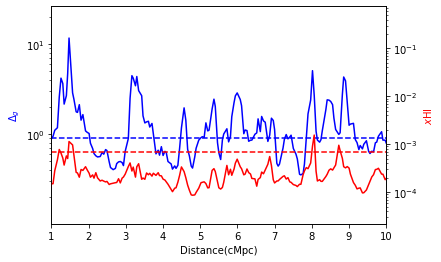

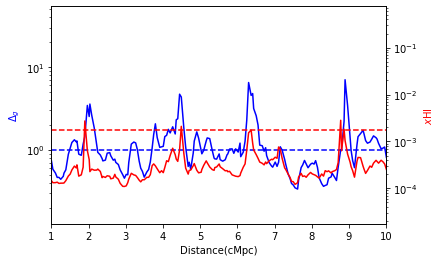

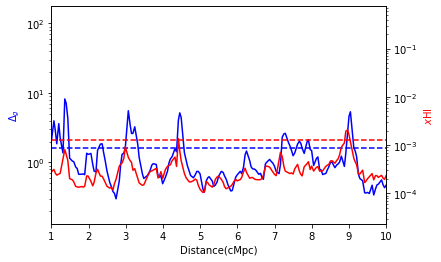

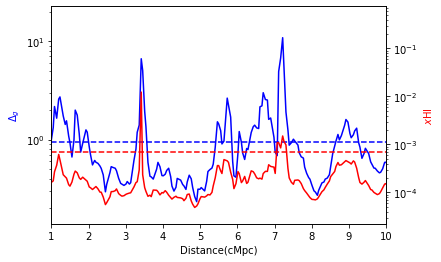

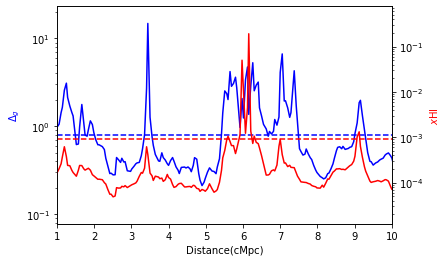

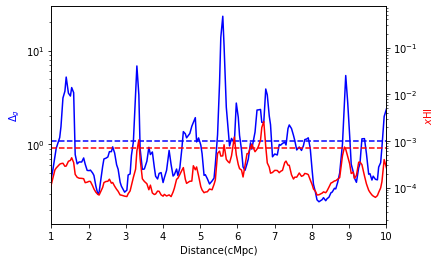

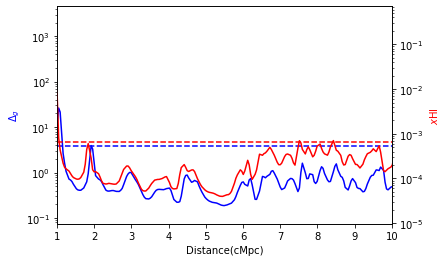

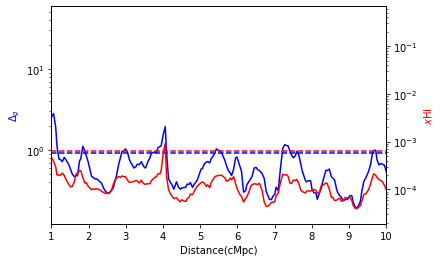

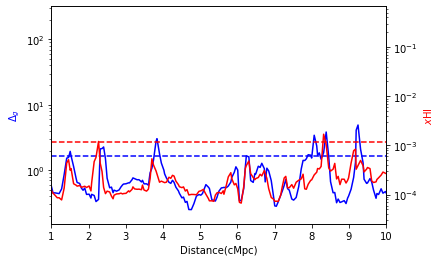

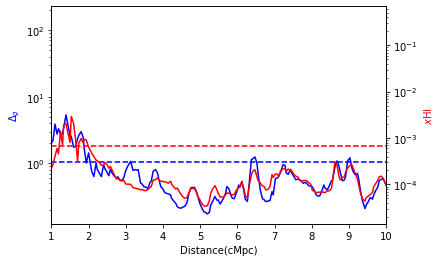

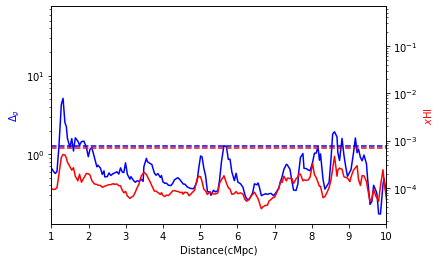

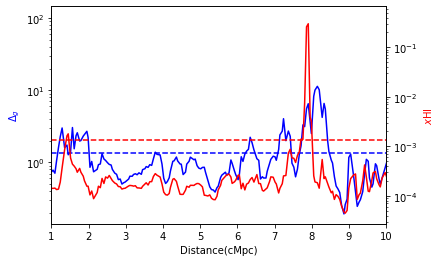

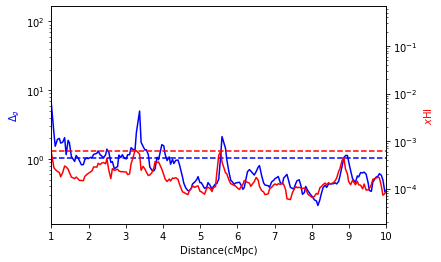

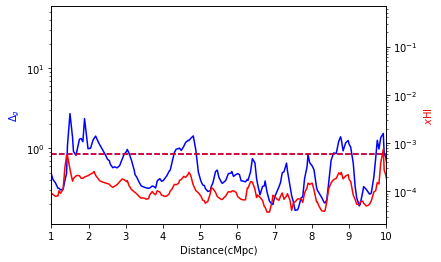

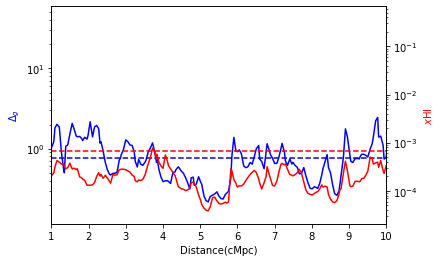

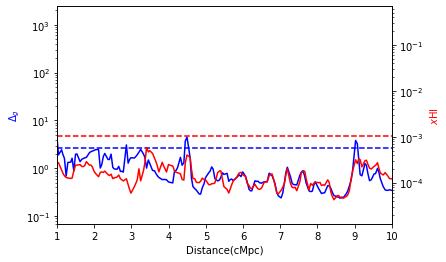

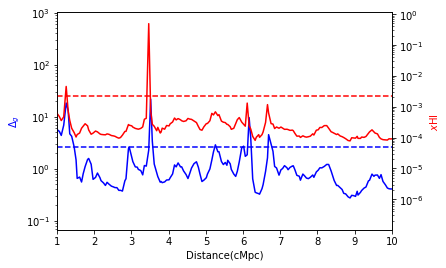

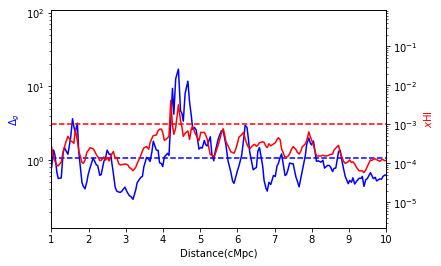

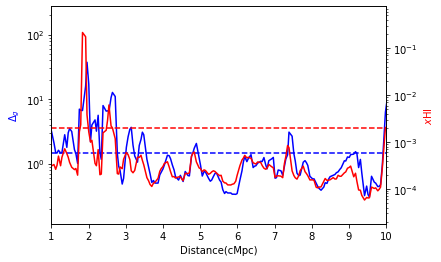

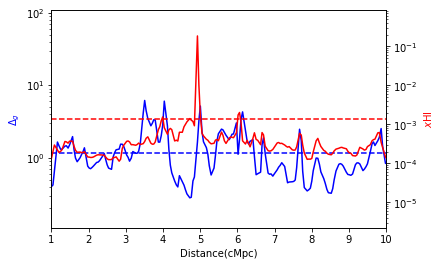

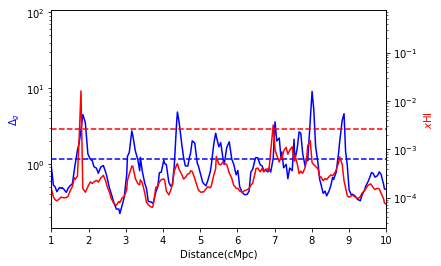

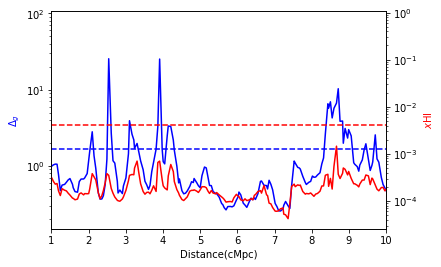

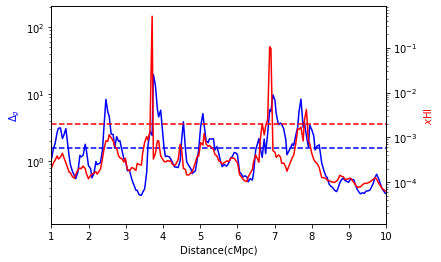

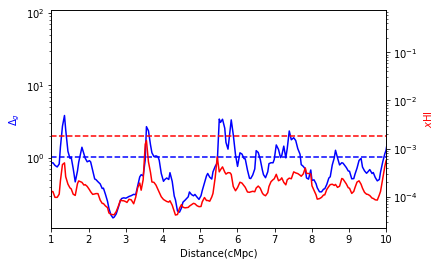

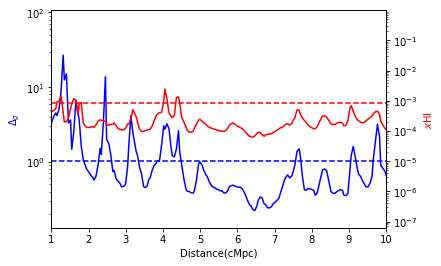

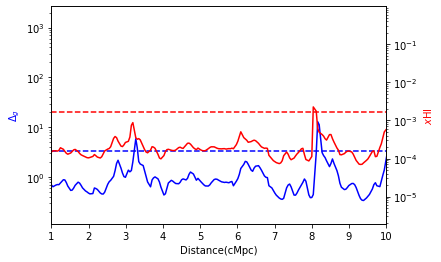

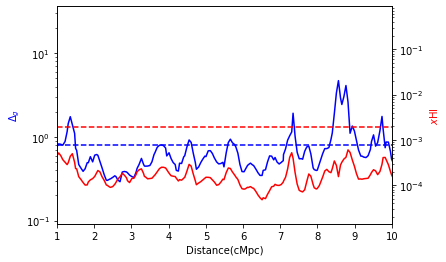

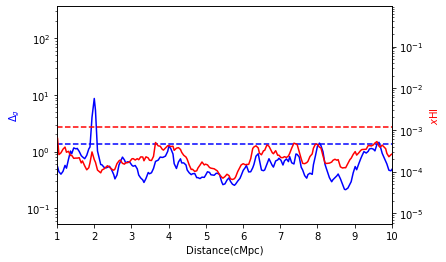

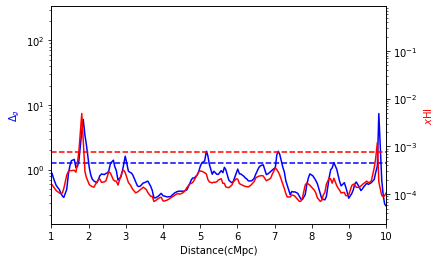

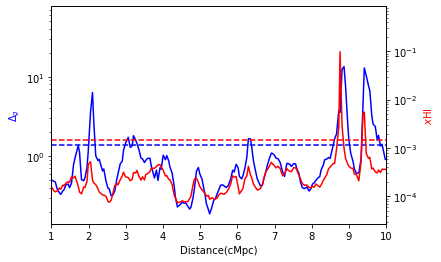

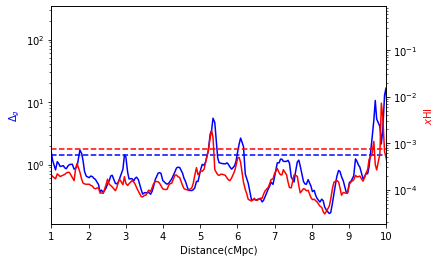

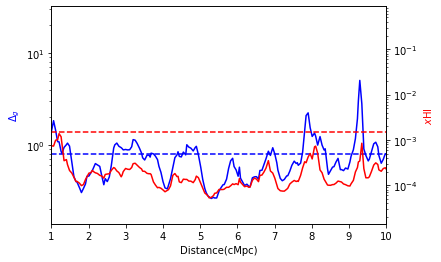

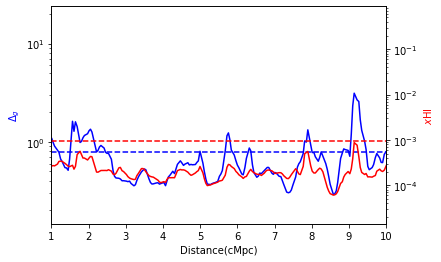

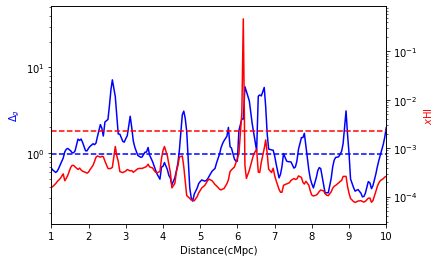

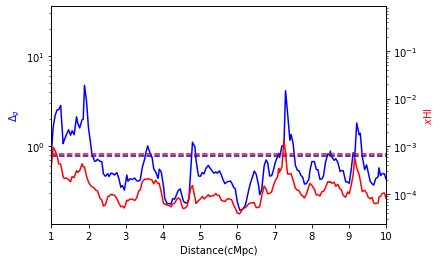

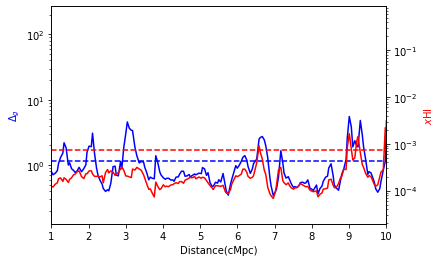

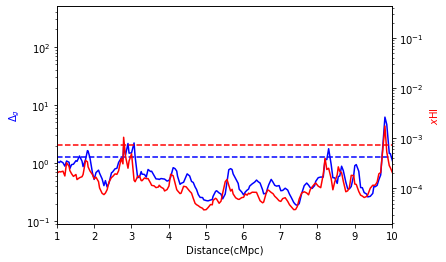

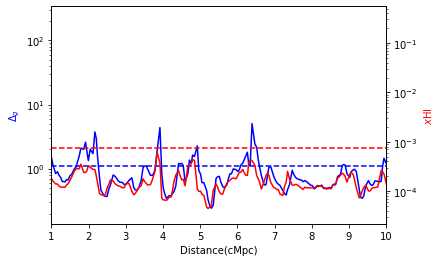

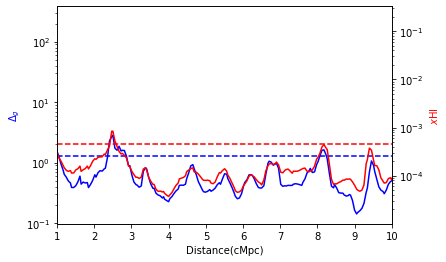

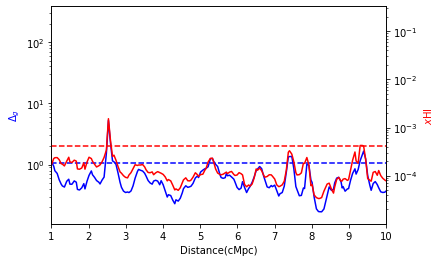

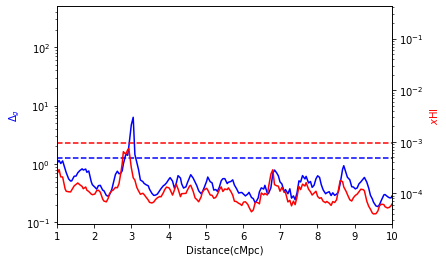

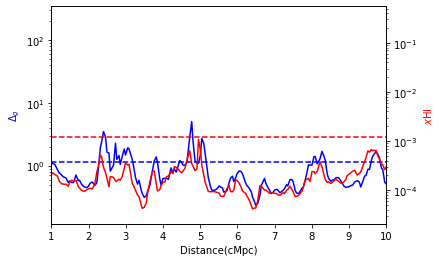

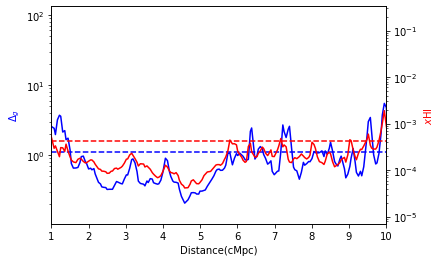

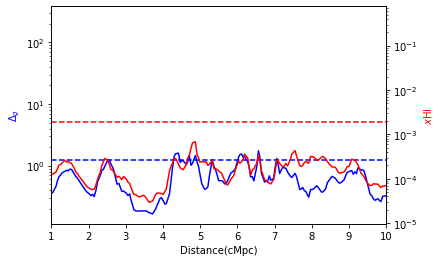

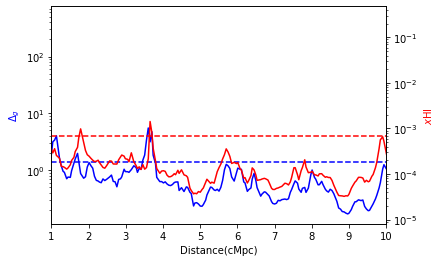

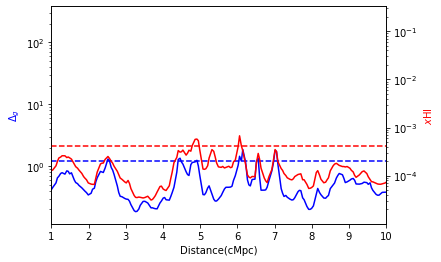

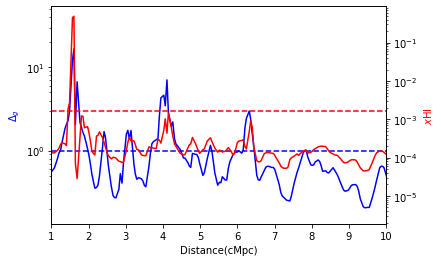

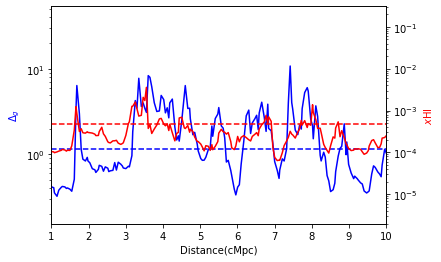

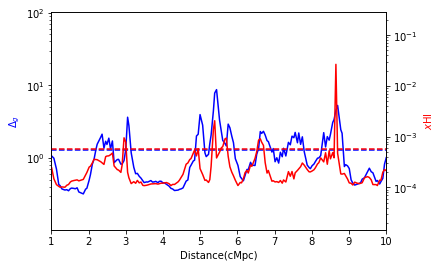

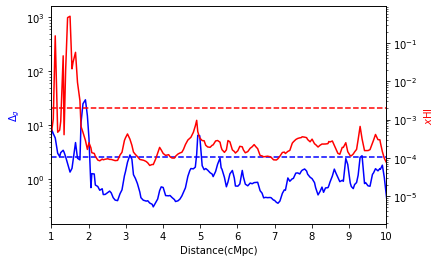

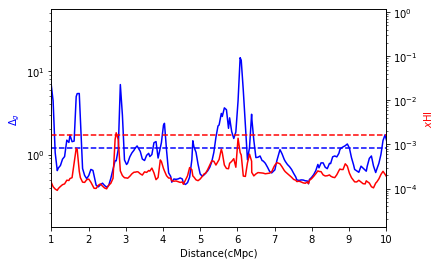

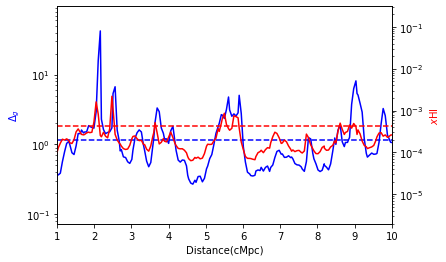

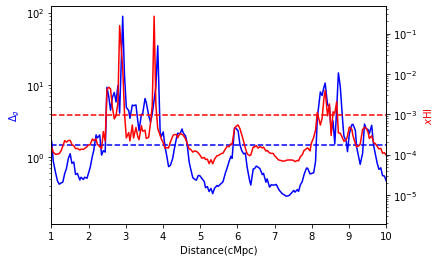

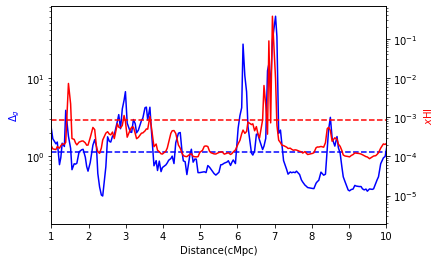

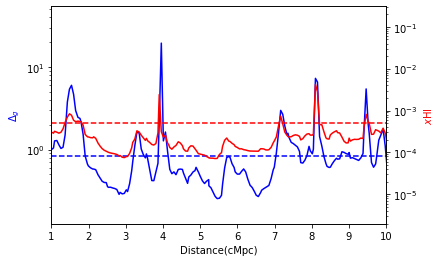

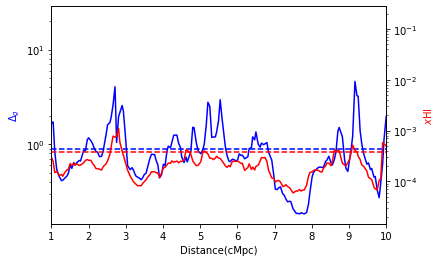

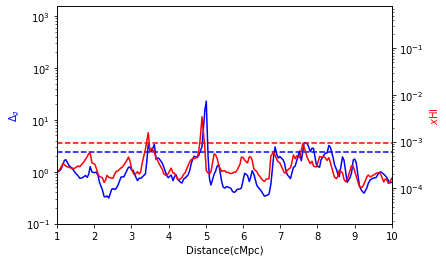

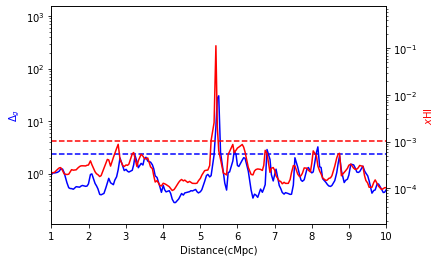

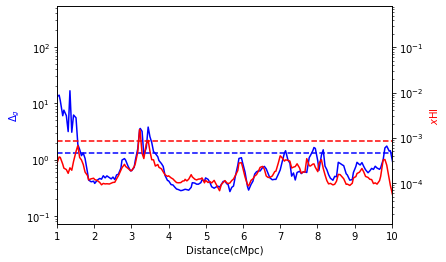

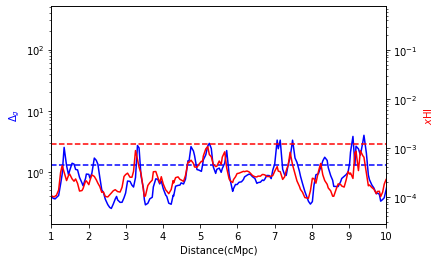

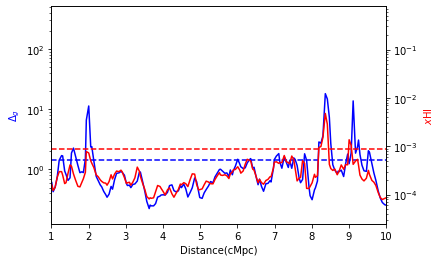

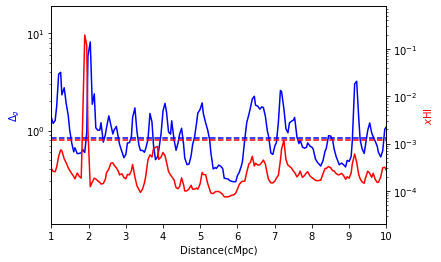

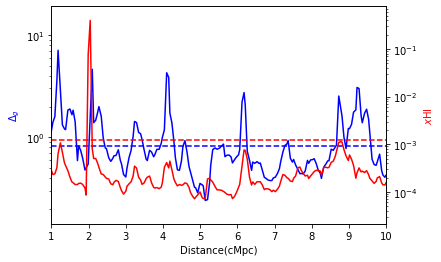

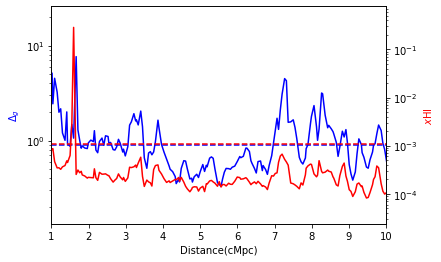

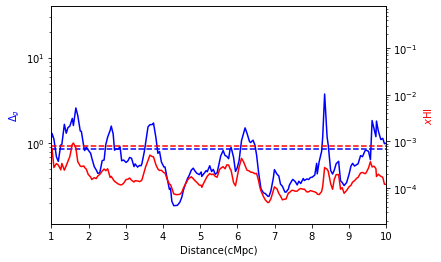

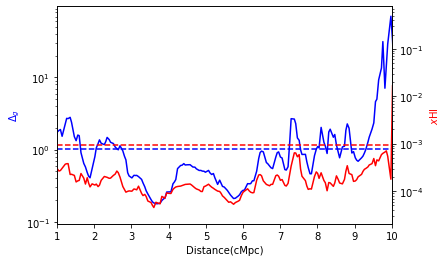

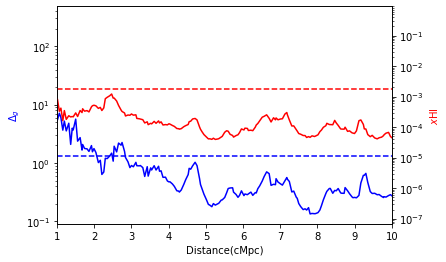

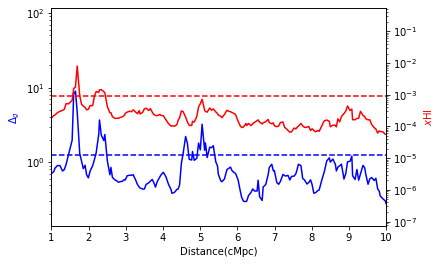

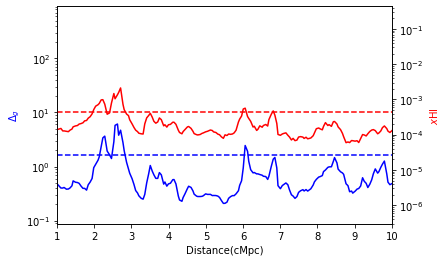

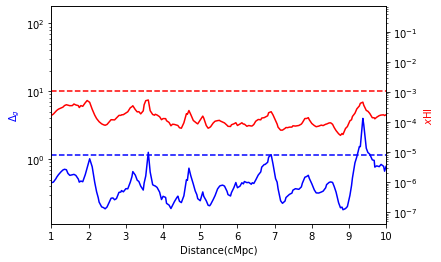

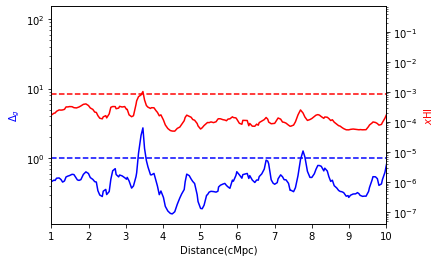

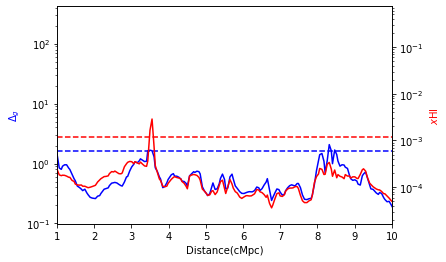

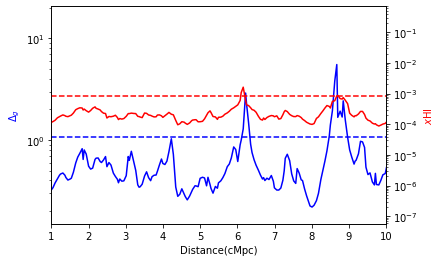

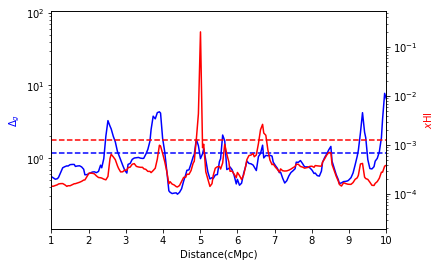

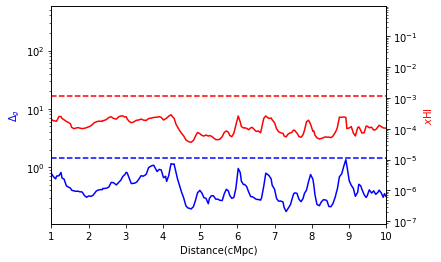

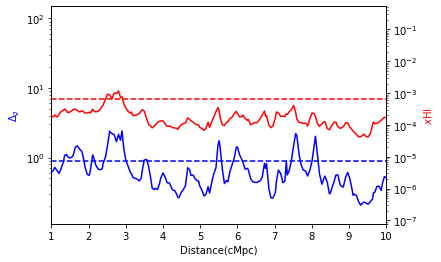

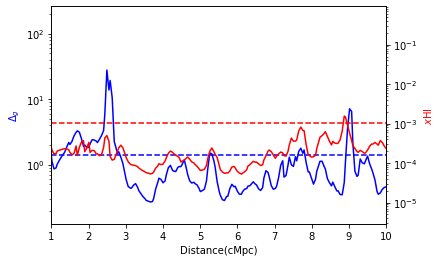

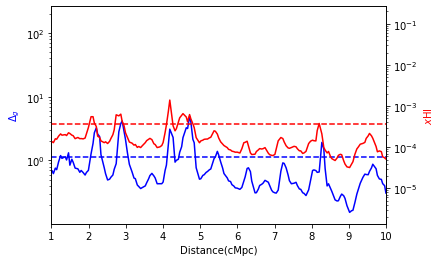

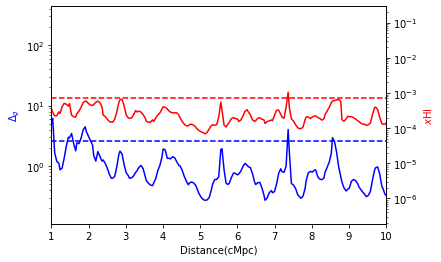

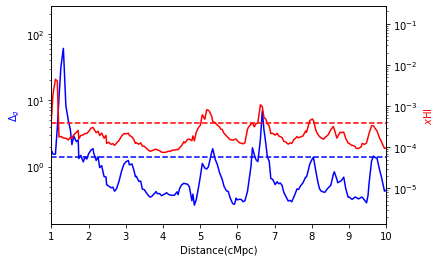

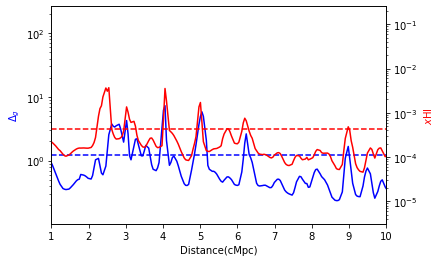

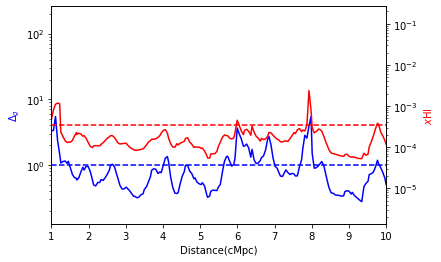

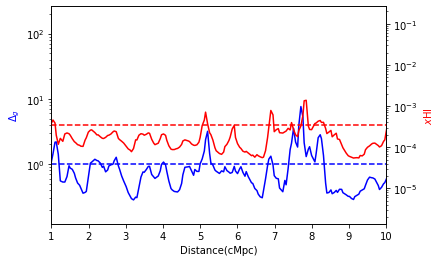

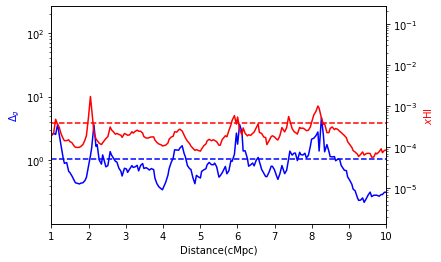

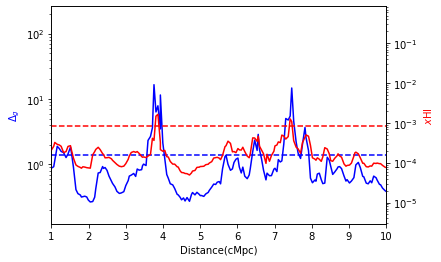

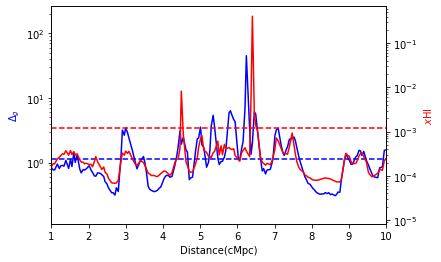

In [81]:
#Plotting the density contrast and the neutral hydrogen fraction for some sight-lines

for startpoint in start:

    for i in range(10):
        direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
        direction = direction/(np.linalg.norm(direction))
        lls, lls_trunc, sight, new_sight = lyman(startpoint, direction)
        #Code for finding the local density maxima on a sightline
        xHI_sight, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 
        d = np.linalg.norm((sight - startpoint), axis = 1)
        d = d/m
        for j in range(len(sight)):
            dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            xHI_sight[j] = xHI[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
        fig, ax = plt.subplots()   
        ax2 = ax.twinx()
        ax.plot(d, dns_sight, color = 'blue')
        ax2.plot(d, xHI_sight, color='red')
        ax.axhline(y = np.mean(dns_sight), color = 'blue', ls ='--')
        ax2.axhline(y= np.mean(xHI_sight), color ='red', ls ='--')

        ax.set_yscale('log')
        ax.set_xlabel('Distance(cMpc)')
        ax.set_ylabel('$\Delta_g$', color = 'blue')
        ax.set_xlim([1, 10])
        ax2.set_yscale('log')
        ax2.set_ylabel('$x$HI', color = 'red')
        plt.show()



In [ ]:
for i in range(10):
    plt.figure(figsize =(20, 10))
    plt.plot(xHI[0, i, :200]*10**4)
    plt.plot(delta[0, i, :200])
    plt.yscale('log')

In [31]:
# %load "/fs/lustre/cita/hqchen/data/scripts/draw_los_well_centered.py"
import array
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt 
import yt
#from pyfrit import ifritfunc
from astropy.cosmology import WMAP9 as cosmo
from scipy.interpolate import interp1d

h100=0.6814
auni_scale=np.loadtxt("auni_abox.txt")
func=interp1d(auni_scale[:,0],auni_scale[:,1])

def random_direction(nlos=10):
    normalrandom=np.random.normal(loc=0,scale=1,size=30*nlos).reshape(3,10*nlos)

    # print( normalrandom,np.shape(normalrandom))
    X=normalrandom[0]
    Y=normalrandom[1]
    Z=normalrandom[2]
    L=(X**2+Y**2+Z**2)**0.5
    X=X[L>0.01][:nlos]
    Y=Y[L>0.01][:nlos]
    Z=Z[L>0.01][:nlos]
    L=L[L>0.01][:nlos]
    return X/L,Y/L,Z/L

N=1024
boxCHIMP=40
ncells=1024

hlist=glob.glob("/data/gnedin/REI/D/Cai.B40.N256L2.sf=1_uv=0.15_bw=10_res=100.WC1/F/rscor/hlists/*.list")
hlist_alist=[float(s.split("hlist_")[-1].split(".list")[0]) for s in hlist]
hlist_alist=np.array(hlist_alist)

abinArr,xHIvArr=np.loadtxt("F_rei_hist.txt",unpack=True)

for abin in abinArr:
    auni=abin
    # find closest catalog
    index=np.argmin(np.abs(hlist_alist-auni))
    fname=hlist[index]
    print(auni,fname)
    print(fname)
    hc=np.loadtxt(fname,usecols=[0,1,5,29,10,11,12,16,17,18,19,20,21,22,26,35,33])
    auni=hc[0,0]
    scale=func(auni)      
    print(1/scale)
    halo_X=hc[:,8]*scale
    halo_Y=hc[:,9]*scale
    halo_Z=hc[:,10]*scale
    halo_ID=np.array(hc[:,1],dtype=int)
    Mvir=hc[:,4]/h100
    print(max(halo_X))

    filt=Mvir>np.sort(Mvir)[-1001]


    # load uniform grid
    binName="z-ifrit-a=0.1401.bin".format(abin)
    with open(binName,'rb') as f:
        binarydata=f.read()
    lllen=8; flen=4; ilen=4 

    firstfield=lllen*2+3*ilen

    nextfield=firstfield

    xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    xHI=np.reshape(xHI,(N,N,N),order='F')

    nextfield+=lllen+N**3*flen
    god=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    god=np.reshape(god,(N,N,N),order='F')


    nextfield+=lllen+N**3*flen
    T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    T=np.reshape(T,(N,N,N),order='F')
    argmin=np.argmin(np.abs(hlist_alist-abin))


    losh5=h5py.File("5xtop1000_new_los_a{:6.4f}.h5".format(abin),"w")
    for ind in range(np.sum(filt)):
        
        grp=losh5.create_group("haloID_"+str(halo_ID[filt][ind]))
         
        spoint=np.array([halo_X[filt][ind],halo_Y[filt][ind],halo_Z[filt][ind]]) #CHIMP
        length=200
        dl_code=0.25
        spoint_code=spoint/40.*ncells
        length_code=length/40.*ncells
        npix=int(length_code/dl_code)
        
        dirxArr,diryArr,dirzArr=random_direction(5)
        cnt=0
        for dirx,diry,dirz in zip(dirxArr,diryArr,dirzArr):
            subgrp=grp.create_group("los_"+str(cnt))
            
            losVec=np.array([dirx,diry,dirz])
    
            dx_code,dy_code,dz_code=dl_code*losVec
    
            xarr_code=spoint_code[0]+np.arange(npix)*dx_code
            yarr_code=spoint_code[0]+np.arange(npix)*dy_code
            zarr_code=spoint_code[0]+np.arange(npix)*dz_code
    
            ix=np.array(np.floor(xarr_code%ncells),dtype=int)
            iy=np.array(np.floor(yarr_code%ncells),dtype=int)
            iz=np.array(np.floor(zarr_code%ncells),dtype=int)
            
            subgrp.create_dataset("xHI",data=xHI[ix,iy,iz])
            subgrp.create_dataset("god",data=god[ix,iy,iz])
            subgrp.create_dataset("T",data=T[ix,iy,iz])
                                  
                                  
            cnt+=1
    losh5.close()


ImportError: cannot import name 'cosmo' from 'astropy.cosmology' (/cita/modules/python/3.10.2/lib/python3.10/site-packages/astropy/cosmology/__init__.py)

## Solving the photoionization equation

In [ ]:
print(h)

In [ ]:
from sympy import *

In [ ]:
from sympy.abc import v
from astropy.constants import h
from astropy.constants import k_B

h = h.to(u.eV*u.s)

T = 1e4*u.K
T = ((T*k_B).to(u.eV)).value

v0 = ((13.6*u.eV)/h).value


x = symbols('x', cls = Function)
L = v**(-1.7)

r = distance[10]
a = 6.30*10**(-18)*(1.34*(v/v0)**(-2.99) - 0.34*(v/v0)**(-3.99))
gamma = integrate((L/(4*pi*r**2 *h*v))*a, (v,v0, oo))

alpha = exp(-28.6130338 - 0.72411256*ln(T) 
            - 2.02604473*10**(-2)*ln(T)**2 
            - 2.38086188*10**(-3)*ln(T)**3
            - 3.21260521*10**(-4)*ln(T)**4
            - 1.42150291*10**(-5)*ln(T)**5
            + 4.98910892*10**(-6)*ln(T)**6
            + 5.75561414*10**(-7)*ln(T)**7
            - 1.85676704*10**(-8)*ln(T)**8
            - 3.07113524*10**(-9)*ln(T)**9)


dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*x(t), x(t))

